In [2]:
import changepath
import pickle
import mne
import brain
import numpy as np
%matplotlib inline

### 1. Define brain and src file names

In [3]:
subjects_dir='/hpc/comco/brovelli.a/db_mne/meg_te/'
subject='subject_04'
# Brain object structure
fname_brain = subjects_dir + subject + '/src/' + subject + '-brain.pickle'
pkl_file = open(fname_brain, 'rb')
brain = pickle.load(pkl_file)
pkl_file.close()
# Source space files
fname_src = subjects_dir + subject + '/src/' + subject + '-src.pickle'
pkl_file = open(fname_src, 'rb')
src = pickle.load(pkl_file)
pkl_file.close()
# Raw MEG data
fname_raw = subjects_dir + subject + '/raw/1/' + subject + '_raw.fif'

### 2. Visualise Brain structure and MarsAtlas parcels

#### 2.1. Display sources in the motor cortex


In [6]:
brain.show_sources(src[0], hemi='lh', lobe=['Frontal'], name=['Mdl'], sphere_color=(0.7, 0.7, 0.7), opacity=1)

#### 2.2. Display sources in Caudate

In [7]:
# 
#  brain.show()
# To show the left frontal areas (problem in insula)
# brain.show_sources(src[0], hemi='lh', lobe=['Frontal'], sphere_color=(0.7, 0.7, 0.7))
# brain.show(hemi='lh', lobe=['Frontal'])

brain.show(hemi='lh', lobe=['Frontal'], name=['Insula'])

### 3. Visualize BEM surfaces with cortical src[0] or subcortical src[1] sources for right src[x][0] and left src[x][1] hemisphere

Using surface: /hpc/comco/brovelli.a/db_mne/meg_te/subject_04/bem/inner_skull.surf
Using surface: /hpc/comco/brovelli.a/db_mne/meg_te/subject_04/bem/outer_skull.surf
Using surface: /hpc/comco/brovelli.a/db_mne/meg_te/subject_04/bem/outer_skin.surf


/hpc/comco/anaconda2/lib/python2.7/site-packages/mne-0.14.dev0-py2.7.egg/mne/viz/misc.py:329: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dat = data[:, :, sl].transpose()


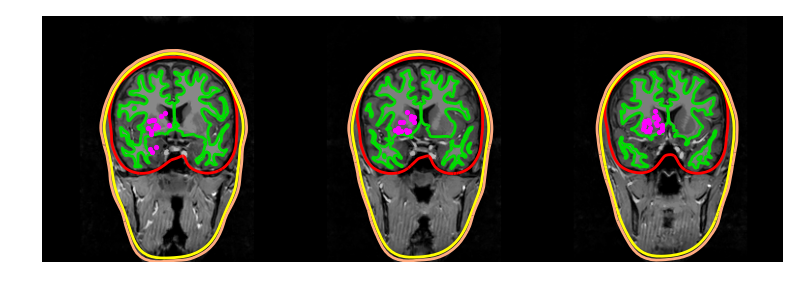

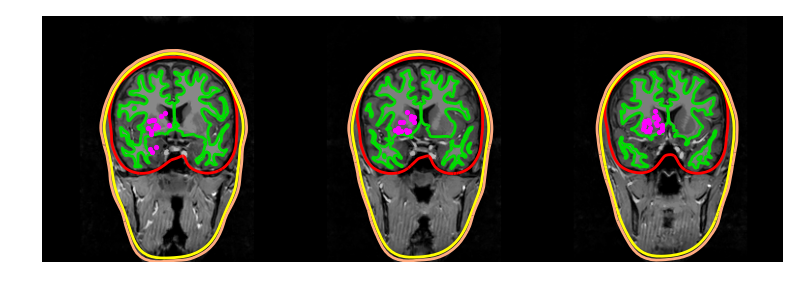

In [8]:
source_model = src[1][1]
mne.viz.plot_bem(subject, subjects_dir, brain_surfaces='white', src=source_model, slices=np.linspace(140,150,3), orientation='coronal')

### 4. Visualize the coregistration

In [9]:
fname_trans = subjects_dir + subject + '/trans/' + subject + '_meg2mri-trans.fif'
info = mne.io.read_info(fname_raw)
mne.viz.plot_trans(info, fname_trans, subject=subject, dig=True, meg_sensors=True, head='outer_skin', subjects_dir=subjects_dir)
# mne.viz.plot_trans(info, fname_trans, subject=subject, dig=[], meg_sensors=[], head=[], brain='white', subjects_dir=subjects_dir)
# mne.viz.plot_trans(info, fname_trans, subject=subject, dig=True, meg_sensors=[], head='outer_skin', brain='pial', subjects_dir=subjects_dir)

Using outer_skin for head surface.
    Triangle neighbors and vertex normals...
Getting helmet for system Magnes_3600wh
